# Chargement des librairies

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Data Management

### Chargement du jeu de données

In [2]:
X_train = pd.read_csv('/Users/salomeamar/Desktop/Challenge Data/x_train.csv', index_col='ID')
y_train = pd.read_csv('y_train.csv', index_col='ID')
X_test = pd.read_csv('x_test.csv', index_col='ID')
X_train

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,...,0.059459,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,...,0.015413,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,...,0.008964,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,...,-0.031769,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,...,-0.038461,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418590,223,5703,32,10,4,77,0.021843,-0.217823,-0.021703,-0.125333,...,0.003160,-0.161543,0.007785,-0.141487,0.008205,-0.268215,-0.058448,0.057577,0.031174,-0.163350
418591,223,5705,35,12,5,91,-0.006920,-0.375251,0.000000,-0.029437,...,0.007169,-0.955492,-0.016221,-0.171172,0.007819,1.540184,-0.015396,-0.502337,-0.011073,0.632885
418592,223,5709,2,1,1,5,0.021869,-0.978856,-0.005929,-1.026267,...,0.001110,-0.476550,0.029714,-0.385972,-0.069148,1.780169,-0.082927,1.581453,0.098607,6.956960


### Analyse exploratoire du jeu de données

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418595 entries, 0 to 418594
Data columns (total 47 columns):
DATE              418595 non-null int64
STOCK             418595 non-null int64
INDUSTRY          418595 non-null int64
INDUSTRY_GROUP    418595 non-null int64
SECTOR            418595 non-null int64
SUB_INDUSTRY      418595 non-null int64
RET_1             416236 non-null float64
VOLUME_1          353570 non-null float64
RET_2             416130 non-null float64
VOLUME_2          352209 non-null float64
RET_3             416088 non-null float64
VOLUME_3          350776 non-null float64
RET_4             416051 non-null float64
VOLUME_4          347598 non-null float64
RET_5             416011 non-null float64
VOLUME_5          343902 non-null float64
RET_6             415998 non-null float64
VOLUME_6          343881 non-null float64
RET_7             416010 non-null float64
VOLUME_7          344742 non-null float64
RET_8             415972 non-null float64
VOLUME_8          3

Notre jeu de données est composé de 46 features, toutes numériques, de 418 595 lignes et d'une cible boolénne RET.
RET correspond au fait que le rendement se situe dans le top 50% des rendements boursiers les plus élevés.

On regarde si on a des doublons. 

In [240]:
(X_train.columns.duplicated()).any()

False

On binarise la target.

In [224]:
y_train.RET = y_train.RET.astype(int)

On regarde si notre jeu de données est équilibré. 

In [221]:
ones = [el for el in y_train.RET if el== 1]
zeros = [el for el in y_train.RET if el== 0]
print('Proportion de 1 :  ',len(ones)/len(y_train)*100)
print('Proportion de 0 :  ',len(zeros)/len(y_train)*100)

Proportion de 1 :   49.89213917987554
Proportion de 0 :   50.10786082012446


On regarde si on a des valeurs manquantes.

In [12]:
X_train.isna().sum()

DATE                  0
STOCK                 0
INDUSTRY              0
INDUSTRY_GROUP        0
SECTOR                0
SUB_INDUSTRY          0
RET_1              2359
VOLUME_1          65025
RET_2              2465
VOLUME_2          66386
RET_3              2507
VOLUME_3          67819
RET_4              2544
VOLUME_4          70997
RET_5              2584
VOLUME_5          74693
RET_6              2597
VOLUME_6          74714
RET_7              2585
VOLUME_7          73853
RET_8              2623
VOLUME_8          73898
RET_9              2682
VOLUME_9          73298
RET_10             2692
VOLUME_10         73305
RET_11             2961
VOLUME_11         72025
RET_12             3186
VOLUME_12         62523
RET_13             3360
VOLUME_13         59008
RET_14             4413
VOLUME_14         60929
RET_15             4990
VOLUME_15         66373
RET_16             5280
VOLUME_16         67262
RET_17             5301
VOLUME_17         62314
RET_18             5307
VOLUME_18       

On a beaucoup de valeurs manquantes dans les features RET et Volume. Il n'est donc pas question de supprimer ces lignes. On traitera les valeurs manquantes par la suite, de deux manières différentes.

On a des features ne comprennant pas un large nombre de valeurs uniques. 

In [121]:
X_train['DATE'].nunique()

156

In [123]:
X_train['SECTOR'].unique()

array([ 3,  6,  8,  1,  5,  7,  4, 10,  2,  0,  9, 11])

In [61]:
X_train['INDUSTRY'].nunique()

72

In [7]:
X_train['SUB_INDUSTRY'].nunique()

175

In [243]:
X_train['INDUSTRY_GROUP'].nunique()

26

In [4]:
X_train['STOCK'].nunique()

5350

In [5]:
X_test['STOCK'].nunique()

5106

On affiches les principales statistiques descriptives du jeu de données (avec valeurs manquantes).

In [13]:
X_train.describe()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,RET
count,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,416236.000000,353570.000000,416130.000000,352209.000000,...,351333.000000,413294.000000,356281.000000,413288.000000,351009.000000,413282.000000,351266.000000,413254.000000,350738.000000,418595.000000
mean,108.659002,3373.567833,37.176020,12.697959,5.483845,90.391663,0.001383,-0.071502,0.000973,-0.075230,...,-0.076018,0.001642,-0.087854,0.001131,-0.076147,-0.000798,-0.076496,-0.000027,-0.076337,0.498921
std,61.891642,1533.157749,19.706505,7.231701,2.410113,47.491157,0.031311,3.038658,0.030987,2.635549,...,2.185741,0.031914,2.094459,0.031435,2.423121,0.030738,2.229668,0.033347,2.721355,0.499999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.845324,-2.434414,-0.770751,-3.007262,...,-5.600056,-0.825014,-4.610393,-0.876157,-4.167784,-0.880000,-2.341887,-0.785714,-2.768928,0.000000
25%,56.000000,2478.000000,22.000000,6.000000,4.000000,49.000000,-0.010970,-0.555394,-0.011312,-0.540629,...,-0.533574,-0.011331,-0.552613,-0.010949,-0.539491,-0.012139,-0.527846,-0.011682,-0.542790,0.000000
50%,104.000000,3560.000000,43.000000,15.000000,6.000000,104.000000,0.000637,-0.282609,0.000401,-0.278437,...,-0.272271,0.000433,-0.285480,0.000000,-0.281753,0.000000,-0.277674,0.000000,-0.283405,0.000000
75%,161.000000,4606.000000,53.000000,19.000000,7.000000,128.000000,0.012950,0.047759,0.012326,0.041177,...,0.029131,0.012862,0.027272,0.012180,0.027639,0.011236,0.030201,0.011712,0.035795,1.000000
max,223.000000,5716.000000,74.000000,26.000000,11.000000,182.000000,1.444990,1232.174009,1.427746,632.268279,...,355.613431,1.707736,408.771698,6.000004,788.461460,2.954430,631.249564,7.208859,932.939205,1.000000


On n'observe pas de valeurs aberrantes. On aurait pu supprimer les lignes où les valeurs nous semblaient extrêmes.

Pour les features représentant des indices, on remarque qu'on a le même count : 418595. Les indices ont donc étés crées de cette manière.

On s'intéresse désormais aux corrélations linéaire entre les variables. 

In [104]:
X_train.corr()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,RET
DATE,1.000000,-0.007430,-0.000682,-0.000720,-0.000714,-0.000639,-0.072090,-0.002234,-0.014798,-0.001918,...,0.001928,-0.022366,0.003643,0.038737,0.000334,-0.005792,-0.000069,0.015081,-0.003019,0.000473
STOCK,-0.007430,1.000000,-0.005968,-0.007242,-0.007360,-0.003550,0.012187,-0.002506,0.010315,-0.002151,...,-0.010534,0.015058,-0.010256,-0.005359,-0.002517,-0.008256,-0.001304,-0.008457,-0.000606,-0.002843
INDUSTRY,-0.000682,-0.005968,1.000000,0.994895,0.982486,0.997780,0.001836,0.005739,-0.006841,0.007958,...,0.003748,-0.001677,0.003100,-0.007337,0.002598,0.007597,0.002783,-0.004053,0.000429,-0.000997
INDUSTRY_GROUP,-0.000720,-0.007242,0.994895,1.000000,0.983174,0.994487,0.002697,0.005637,-0.007309,0.007672,...,0.003791,-0.001051,0.002662,-0.006594,0.002337,0.006955,0.002326,-0.003718,0.000456,-0.000737
SECTOR,-0.000714,-0.007360,0.982486,0.983174,1.000000,0.980162,0.002287,0.004997,-0.006875,0.007031,...,0.003745,-0.002504,0.002782,-0.006098,0.001591,0.008488,0.001306,-0.004210,-0.000029,-0.000137
SUB_INDUSTRY,-0.000639,-0.003550,0.997780,0.994487,0.980162,1.000000,0.002361,0.005556,-0.006820,0.007630,...,0.003680,-0.001376,0.002782,-0.007553,0.002709,0.007267,0.002847,-0.003871,0.000368,-0.001140
RET_1,-0.072090,0.012187,0.001836,0.002697,0.002287,0.002361,1.000000,0.116263,-0.032296,0.002525,...,0.002835,0.012806,0.002332,-0.001856,0.000068,0.005844,0.001188,-0.009281,0.004508,-0.016845
VOLUME_1,-0.002234,-0.002506,0.005739,0.005637,0.004997,0.005556,0.116263,1.000000,0.046741,0.349464,...,-0.008548,0.001224,-0.006868,0.000898,-0.008682,0.000745,-0.008300,-0.002982,-0.005632,0.004757
RET_2,-0.014798,0.010315,-0.006841,-0.007309,-0.006875,-0.006820,-0.032296,0.046741,1.000000,0.114361,...,-0.003919,0.061947,-0.007177,0.033200,-0.002981,-0.043112,0.000434,-0.058106,0.003095,-0.009127
VOLUME_2,-0.001918,-0.002151,0.007958,0.007672,0.007031,0.007630,0.002525,0.349464,0.114361,1.000000,...,-0.007807,-0.000442,-0.006113,-0.001445,-0.008841,0.001548,-0.010845,-0.000655,-0.008284,0.000978


Les corrélations linéaires entre variables ne nous semblent pas significatives. 

# Modèles

### Pre-processing

Afin de créer de nouvelles features et de sélectionner les features à mettre dans le modèle, on crée des classes héritant de BaseEstimator et TransformerMixin, et l'on chainera ces opérations dans une Pipeline.

Nous allons créer de nouvelles features catégorielles, calculées à partir de statistiques sur une cible donnée, conditionnellement à des features données. 

Par défaut, la classe Features_engi crée des features résumant la médiane de RET_1 , RET_5, RET_11, RET_15, RET_20 conditionnellement à SECTEUR et DATE, et la médiane de VOLUME_1, VOLUME_5, VOLUME_11, VOLUME_15, VOLUME_20 conditionnellement à STOCK et INDUSTRY.

In [208]:
class Features_engi(BaseEstimator, TransformerMixin):
    
    def __init__(self, shifts = [1, 5, 11, 15, 20], statistics = ['median'], target_feature = ['RET'], gb_features = ['SECTOR','DATE','STOCK']):
        self.shifts = shifts # pour réduire le bruit, on peut ne pas tous les prendre
        self.statistics = statistics # type de statistique 
        self.target_feature = target_feature 
        self.gb_features = gb_features
        self.tmp_name = str()
        self.new_features = []
        
        
    def fit(self, X, y=None):  
        self.tmp_name = '_'.join(self.gb_features)
        return self
        
    def transform(self, X, y=None):
        #X_ = pd.DataFrame(X).copy()
        for shift in self.shifts:
            for stat in self.statistics:
                for target in self.target_feature :
                    name = f'{target}_{shift}_{self.tmp_name}_{stat}'
                    feat = f'{target}_{shift}'
                    self.new_features.append(name)
                    X[name] = X.groupby(self.gb_features)[feat].transform(stat)
        features = list(X.columns)
        features += self.new_features  # on ajoute les features conditionnelles
        X_ = X[features].copy()
        X_ = X_.loc[:,~X_.columns.duplicated()] #au cas où on a des duplicats
        X_[X_==np.inf]=np.nan #pour gérer les valeurs infinies avec l'imputer 
        return X_


La classe Features_select sélectionne les features à garder dans le modèle.
On a crée une liste de features pre-defini, comprennant toutes les nouvelles features et les features RET_1 à RET_20, VOLUME_1 à VOLUME_20.

In [205]:
class Features_select(BaseEstimator, TransformerMixin):
    
    def __init__(self, select = None) :
        self.select = select
        self.features_select = list()
              
    def fit(self, X, y=None): 
        if self.select == None :
            self.features_select = list(X.columns.copy()) # si aucun paramètre, on garde toutes les features
            
        elif self.select == 'pre-defini' : # liste de features déjà définie pour simplifier le code dans la Pipeline
            self.features_select += ['RET_%d' % (i+1) for i in range(20)]
            self.features_select += ['VOLUME_%d' % (i+1) for i in range(20)]
            self.features_select += ['RET_%d_SECTOR_DATE_STOCK_median' % (i) for i in [1, 5, 11, 15, 20]]
            self.features_select += ['VOLUME_%d_STOCK_INDUSTRY_median' % (i) for i in [1, 5, 11, 15, 20]]

        else : 
            self.features_select = self.select.copy() # si une liste de features est donnée
        return self
        
    def transform(self, X, y=None):
        X_ = X[self.features_select].copy()
        X_ = X_.loc[:,~X_.columns.duplicated()] 
        return X_

### Création des Pipelines et choix d'un modèle

Nous allons créer 5 modèles différents : 
- création de features par défaut, sélection des features pré-définies, remplissage des valeurs manquantes par 0, normalisation des valeurs, random forest
- création de features par défaut, sélection des features pré-définies, remplissage des valeurs manquantes par la moyenne, normalisation des valeurs, random forest
- création de features par défaut, sélection des features pré-définies, remplissage des valeurs manquantes par 0, normalisation des valeurs, gradient boosting
- création de features par défaut, sélection des features pré-définies, remplissage des valeurs manquantes par la moyenne, normalisation des valeurs, gradient boosting
- création de features par une autre méthode, sélection des features par une liste de features, remplissage des valeurs manquantes par la moyenne, normalisation des valeurs, random forest

Nous avons choisi des méthodes de boosting et de bagging. 

Nous exécuterons également une validation croisée stratifiée pour obtenir un meilleur aperçu des résultats. On stratifie afin de ne pas avoir des proportions différentes de 1 et de 0 dans les jeux d’entraînement et de test, ce qui pourrait biaiser les résultats.

Pour la random forest, on choisi un grand nombre d'arbres peu profonds, afin d'éviter l'overfitting.

In [126]:
y = y_train.RET

In [113]:
st_cv = StratifiedKFold(5)

In [209]:
clf_zero_rf = Pipeline([("engin1",Features_engi()), 
                        ('engin2', Features_engi(target_feature = ['VOLUME'], gb_features = ['STOCK','INDUSTRY'])),
                        ('selection', Features_select('pre-defini')),
                        ("zero", SimpleImputer(missing_values=np.nan,strategy='constant', fill_value=0)),
                        ("scale", MinMaxScaler()), 
                        ("rf", RandomForestClassifier(n_estimators= 200, max_depth= 5))])

clf_zero_rf.fit(X_train, y)
clf_zero_rf.predict(X_train)
score_zero_rf = cross_val_score(clf_zero_rf, X_train, y, cv=st_cv, scoring = 'accuracy')
score_zero_rf.mean()

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

0.5143300267707513

In [226]:
clf_mean_rf = Pipeline([("engin1", Features_engi()), 
                        ('engin2', Features_engi(target_feature = ['VOLUME'], gb_features = ['STOCK','INDUSTRY'])),
                        ('selection', Features_select('pre-defini')),
                        ("mean", SimpleImputer(missing_values=np.nan,strategy='mean')),
                        ("scale", MinMaxScaler()), 
                        ("rf", RandomForestClassifier(n_estimators= 200, max_depth= 5))])

clf_mean_rf.fit(X_train, y)
score_mean_rf = cross_val_score(clf_mean_rf, X_train, y, cv=st_cv, scoring = 'accuracy')
score_mean_rf.mean()

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

0.5157227771658973

In [212]:
clf_zero_gb = Pipeline([('engin1', Features_engi()), 
                        ('engin2', Features_engi(target_feature = ['VOLUME'], gb_features = ['STOCK','INDUSTRY'])),
                        ('selection', Features_select('pre-defini')),
                        ("zero", SimpleImputer(missing_values=np.nan,strategy='constant', fill_value=0)),
                        ("scale", MinMaxScaler()), 
                        ("gb", GradientBoostingClassifier())])

clf_zero_gb.fit(X_train, y)
score_zero_gb = cross_val_score(clf_zero_gb, X_train, y, cv=st_cv, scoring = 'accuracy')
score_zero_gb.mean()

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

0.5121154900090796

In [213]:
clf_mean_gb = Pipeline([('engin1', Features_engi()), 
                        ('engin2', Features_engi(target_feature = ['VOLUME'], gb_features = ['STOCK','INDUSTRY'])),
                        ('selection', Features_select('pre-defini')),
                        ("mean", SimpleImputer(missing_values=np.nan,strategy='mean')), 
                        ("scale", MinMaxScaler()), 
                        ("gb", GradientBoostingClassifier())])

clf_mean_gb.fit(X_train, y)
score_mean_gb = cross_val_score(clf_mean_gb, X_train, y, cv=st_cv, scoring = 'accuracy')
score_mean_gb.mean()

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

0.5126625575212529

Pour ce dernier modèle, on a choisi de créer RET_1 à RET_5, VOLUME_1 à VOLUME_5 conditionnellement à SECTOR, INDUSTRY, STOCK, et de ne garder que ces nouvelles features et RET_1 à RET_5, VOLUME_1 à VOLUME_5 dans le modèle. 

In [233]:
lst = ['RET_%d' % (i+1) for i in range(5)]
lst += ['VOLUME_%d' % (i+1) for i in range(5)]
lst += ['VOLUME_%d_SECTOR_INDUSTRY_STOCK_median' % (i+1) for i in range(5)]
lst += ['RET_%d_SECTOR_INDUSTRY_STOCK_median' % (i+1) for i in range(5)]

            
clf_mean_rf2 = Pipeline([("engin1", Features_engi(shifts = [1,2,3,4,5], statistics = ['median'], target_feature = ['RET', 'VOLUME'], gb_features = ['SECTOR','INDUSTRY','STOCK'])), 
                        ('selection', Features_select(lst)),
                        ("mean", SimpleImputer(missing_values=np.nan,strategy='mean')),
                        ("scale", MinMaxScaler()), 
                        ("rf", RandomForestClassifier(n_estimators= 200, max_depth= 5))])

clf_mean_rf2.fit(X_train, y)
score_mean_rf2 = cross_val_score(clf_mean_rf2, X_train, y, cv=st_cv, scoring = 'accuracy')
score_mean_rf2.mean()

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

0.5123233229407811

Nous choisissons le deuxième modèle, ayant l'Accuracy la plus élévée, bien qu'elles soient toutes très proches. Nous allons tenter d'affiner ce modèle. 

### Sélection des paramètres du modèle choisi

In [133]:
clf_mean_rf.steps[4][1].get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [227]:
param_grid = [
{'rf__max_depth': [6, 8, 10], 'rf__max_features': [10, 20], 'rf__n_estimators': [100, 200]}
]

grid_search_forest = GridSearchCV(clf_mean_rf, param_grid, cv=st_cv)
grid_search_forest.fit(X_train[:2000], y[:2000]) #que sur les 2000 premières lignes sinon ça ne charge pas (machine pas assez puissante)

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('engin1',
                                        Features_engi(gb_features=['SECTOR',
                                                                   'DATE',
                                                                   'STOCK'],
                                                      shifts=[1, 5, 11, 15, 20],
                                                      statistics=['median'],
                                                      target_feature=['RET'])),
                                       ('engin2',
                                        Features_engi(gb_features=['STOCK',
                                                                   'INDUSTRY'],
                                                      shifts=[1, 5, 11, 1...
                              

In [228]:
grid_search_forest.best_params_

{'rf__max_depth': 8, 'rf__max_features': 20, 'rf__n_estimators': 200}

In [246]:
clf = Pipeline([("engin1", Features_engi()), 
                        ('engin2', Features_engi(target_feature = ['VOLUME'], gb_features = ['STOCK','INDUSTRY'])),
                        ('selection', Features_select('pre-defini')),
                        ("mean", SimpleImputer(missing_values=np.nan,strategy='mean')),
                        ("scale", MinMaxScaler()), 
                        ("rf", RandomForestClassifier(max_depth= 8, max_features= 20, n_estimators= 200))])

clf.fit(X_train, y)
score = cross_val_score(clf, X_train, y, cv=st_cv, scoring = 'accuracy')
score.mean()

/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/salomeamar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

0.5152091622028105

### Génération des prédictions

In [249]:
y_pred = clf.predict(X_test)

In [252]:
y_pred == 1

array([ True,  True,  True, ...,  True,  True,  True])

In [254]:
submission = pd.Series(y_pred)
submission.index = X_test.index
submission.to_csv('./submissions_qrt.csv', index=True, header=True)

### Features importance

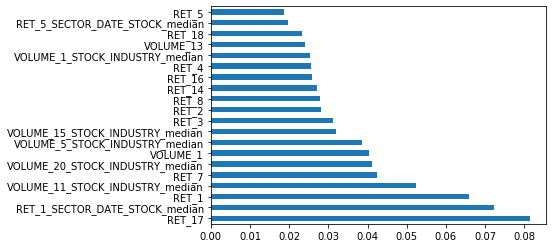

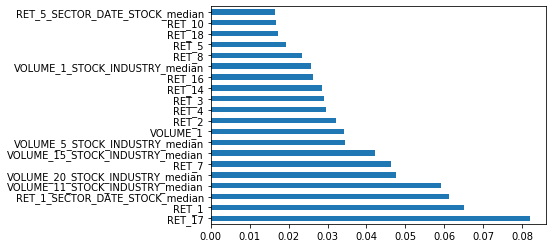

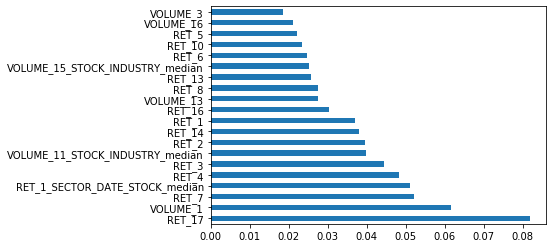

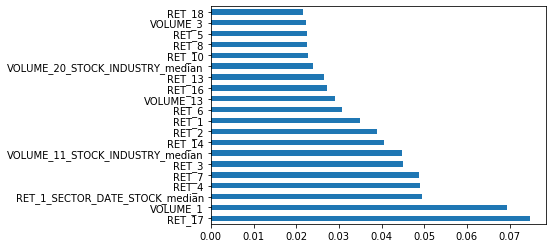

In [268]:
models = [clf_zero_rf, clf_mean_rf, clf_zero_gb, clf_mean_gb]
features = ['RET_%d' % (i+1) for i in range(20)]
features += ['VOLUME_%d' % (i+1) for i in range(20)]
features += ['RET_%d_SECTOR_DATE_STOCK_median' % (i) for i in [1, 5, 11, 15, 20]]
features += ['VOLUME_%d_STOCK_INDUSTRY_median' % (i) for i in [1, 5, 11, 15, 20]]

for model in models : 
    fimp = model.steps[5][1].feature_importances_
    feat_importances = pd.Series(fimp, index=col)
    feat_importances.nlargest(20).plot(kind='barh')
    plt.show()

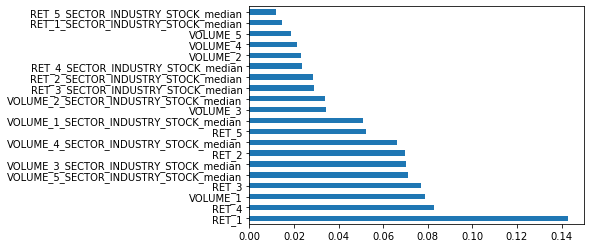

In [276]:
fimp = clf_mean_rf2.steps[4][1].feature_importances_
feat_importances = pd.Series(fimp, index=lst)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Dans tous nos modèles, certaines des nouvelles features apparaissent dans les 20 features les plus importantes.